# Basic installations and imports

In [101]:
!pip install xlrd 
!pip install geopy
!pip install folium
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Data importation

In [8]:
df = pd.read_excel("US_City_Populations.xlsx")
df

,State,City,Population
0,Alabama,Abernant,7599
1,Alabama,Alabaster,31545
2,Alabama,Albertville,21458
3,Alabama,Alexander City,14849
4,Alabama,Andalusia,9081
...,...,...,...
6884,Wyoming,Lander,7642
6885,Wyoming,Torrington,6736
6886,Wyoming,Douglas,6423
6887,Wyoming,Powell,6407


# Exploratory Data Analysis

### Most populated cities

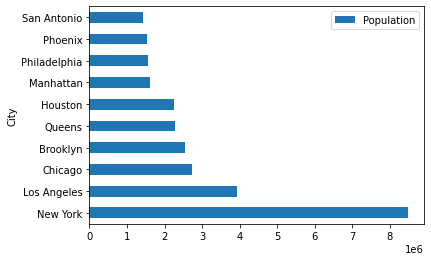

In [20]:
df.sort_values("Population",ascending=False).head(10).plot(x="City",y="Population",kind="barh")

### Most populated states

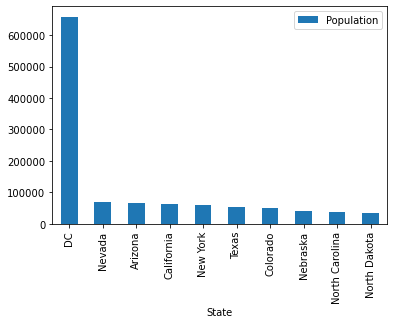

In [27]:
df[["State","Population"]].groupby("State").mean().sort_values("Population",ascending=False).head(10).plot(kind="bar")

In [ ]:
### Number of cities per state

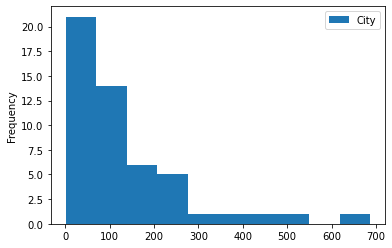

In [36]:
df[["State","City"]].groupby("State").count().sort_values("City",ascending=False).plot(kind="hist")

# Data preparation

### Dataframe transformation

In [73]:
df_states = df[["State","Population"]].groupby("State").sum().reset_index()
df_states

,State,Population
0,Alabama,2871858
1,Alaska,504693
2,Arizona,6414744
3,Arkansas,1506563
4,California,42058827
5,Colorado,5835761
6,Connecticut,3438343
7,DC,658893
8,Delaware,656848
9,Florida,16550475


### Dataframe shape and description

In [74]:
df_states.shape

(51, 2)

We have 51 states in this dataset

In [75]:
df_states.describe()

,Population
count,5.100000e+01
mean,4.840130e+06
std,7.246327e+06
min,2.090900e+05
25%,1.129803e+06
50%,2.871858e+06
75%,5.165758e+06
max,4.205883e+07


The minimum state population is around 200,000 people, the maximum is around 42,000,000 people.

### State coordinates integration

We will now affect to each state its coordinates using the following function :

In [78]:
geolocator = Nominatim(user_agent="foursquare_agent")
def get_coords(state_name):
    global geolocator
    location = geolocator.geocode(state_name)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

We calculate those coordinates

In [79]:
coords = [get_coords(s) for s in df_states['State']]
coords

[(33.2588817, -86.8295337),
 (64.4459613, -149.680909),
 (34.395342, -111.7632755),
 (35.2048883, -92.4479108),
 (36.7014631, -118.7559974),
 (38.7251776, -105.6077167),
 (41.6500201, -72.7342163),
 (4.59808, -74.0760439),
 (38.6920451, -75.4013315),
 (27.7567667, -81.4639835),
 (32.3293809, -83.1137366),
 (21.2160437, -157.975203),
 (43.6447642, -114.0154071),
 (40.0796606, -89.4337288),
 (40.3270127, -86.1746933),
 (41.9216734, -93.3122705),
 (38.27312, -98.5821872),
 (37.5726028, -85.1551411),
 (30.8703881, -92.007126),
 (45.709097, -68.8590201),
 (39.5162234, -76.9382069),
 (42.3788774, -72.032366),
 (43.6211955, -84.6824346),
 (45.9896587, -94.6113288),
 (32.9715645, -89.7348497),
 (38.7604815, -92.5617875),
 (47.3752671, -109.6387579),
 (41.7370229, -99.5873816),
 (39.5158825, -116.8537227),
 (43.4849133, -71.6553992),
 (40.0757384, -74.4041622),
 (34.5708167, -105.993007),
 (40.7127281, -74.0060152),
 (35.6729639, -79.0392919),
 (47.6201461, -100.540737),
 (40.2253569, -82.68813

And we finally affect them to our dataframe

In [117]:
latitudes = [c[0] for c in coords]
longitudes = [c[1] for c in coords]

df_states["Latitude"] = latitudes
df_states["Longitude"] = longitudes

df_states.head(10)

,State,Population,Latitude,Longitude
0,Alabama,2871858,33.258882,-86.829534
1,Alaska,504693,64.445961,-149.680909
2,Arizona,6414744,34.395342,-111.763276
3,Arkansas,1506563,35.204888,-92.447911
4,California,42058827,36.701463,-118.755997
5,Colorado,5835761,38.725178,-105.607717
6,Connecticut,3438343,41.650020,-72.734216
7,DC,658893,4.598080,-74.076044
8,Delaware,656848,38.692045,-75.401331
9,Florida,16550475,27.756767,-81.463983


# Kmeans clustering

Before doing the Kmeans clustering, we will only keep numerical data : Population, Latitude and Longitude

In [119]:
df_states_clustering = df_states.drop("State",axis=1)
df_states_clustering

,Population,Latitude,Longitude
0,2871858,33.258882,-86.829534
1,504693,64.445961,-149.680909
2,6414744,34.395342,-111.763276
3,1506563,35.204888,-92.447911
4,42058827,36.701463,-118.755997
5,5835761,38.725178,-105.607717
6,3438343,41.650020,-72.734216
7,658893,4.598080,-74.076044
8,656848,38.692045,-75.401331
9,16550475,27.756767,-81.463983


Now that our dataframe is ready, we will proceed to the clustering, we choose a number of clusters of 5 :

In [127]:
n = 5
km = KMeans(n_clusters=n).fit(df_states_clustering)
km.labels_

array([0, 3, 4, 3, 2, 4, 0, 3, 3, 1, 4, 0, 3, 4, 0, 3, 0, 0, 0, 3, 4, 4,
       4, 0, 3, 0, 3, 3, 0, 3, 4, 3, 1, 4, 3, 4, 0, 0, 4, 3, 0, 3, 4, 1,
       0, 3, 4, 4, 3, 0, 3], dtype=int32)

We will affect now each state to its cluster in a new dataframe :

In [128]:
df_final = df_states.copy()
df_final.insert(0,"Cluster",km.labels_)
df_final

,Cluster,State,Population,Latitude,Longitude
0,0,Alabama,2871858,33.258882,-86.829534
1,3,Alaska,504693,64.445961,-149.680909
2,4,Arizona,6414744,34.395342,-111.763276
3,3,Arkansas,1506563,35.204888,-92.447911
4,2,California,42058827,36.701463,-118.755997
5,4,Colorado,5835761,38.725178,-105.607717
6,0,Connecticut,3438343,41.650020,-72.734216
7,3,DC,658893,4.598080,-74.076044
8,3,Delaware,656848,38.692045,-75.401331
9,1,Florida,16550475,27.756767,-81.463983


# Results Visualization

We will use the folium library to visualize the clusters on a map of USA :

In [129]:
latitude =38.1828762
longitude = -100.2725161
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(n)
ys = [i + x + (i*x)**2 for i in range(n)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['Latitude'], df_final['Longitude'], df_final['State'], df_final['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)   
map_clusters